### K-means clustering - example I

In [1]:
from sklearn.datasets import make_blobs 
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [2]:
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)

In [3]:
print(X.shape, y.shape)

(120, 2) (120,)


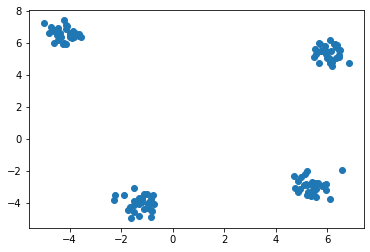

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:, 1])
plt.show()

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="random")
kmeans.fit(X, y)
y_pred = kmeans.predict(X)

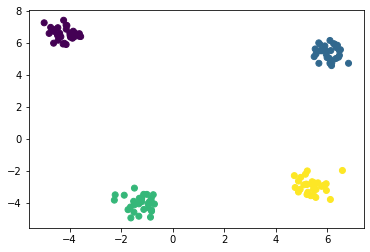

In [6]:
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.show()

In [7]:
print(kmeans.cluster_centers_)

[[-4.20064323  6.56646074]
 [ 6.08505604  5.34524927]
 [-1.25528818 -4.0447595 ]
 [ 5.41281505 -2.94307867]]


### K-means clustering - example II

In [8]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

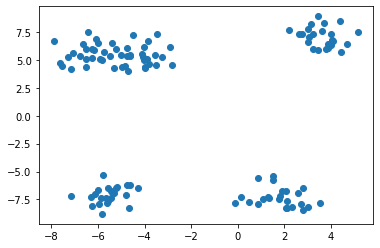

In [9]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, init="random")
kmeans.fit(X, y)
y_pred = kmeans.predict(X)

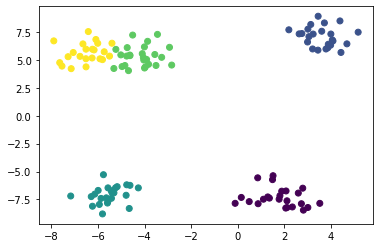

In [11]:
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.show()

In [12]:
print(kmeans.cluster_centers_)

[[ 1.77522959 -7.32882431]
 [ 3.61295377  7.08053795]
 [-5.52866518 -7.08803291]
 [-4.18027771  5.32199643]
 [-6.50318238  5.63908324]]


In [13]:
kmeans = KMeans(n_clusters=2, init="random")
kmeans.fit(X, y)
y_pred = kmeans.predict(X)

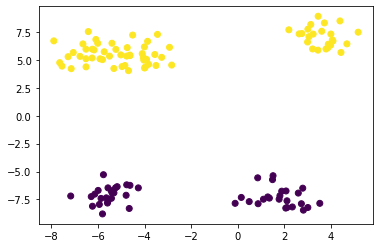

In [14]:
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.show()

In [15]:
print(kmeans.cluster_centers_)

[[-1.87671779 -7.20842861]
 [-2.29231031  6.00506457]]


### K-means ++

In [16]:
kmeans = KMeans(n_clusters=2, init="k-means++")
kmeans.fit(X, y)
y_pred = kmeans.predict(X)

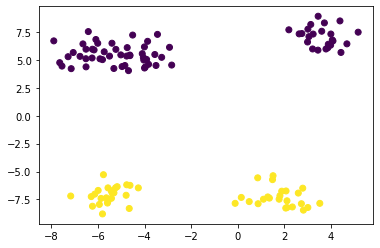

In [17]:
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.show()

In [18]:
print(kmeans.inertia_)

2150.707636624733


### Elbow method

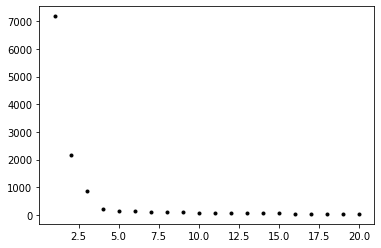

In [19]:
clusters = range(1, 21)
iner_lst = []
for i_cl in clusters:
    iner_lst.append(KMeans(n_clusters=i_cl, init="k-means++").fit(X,y).inertia_)

plt.plot(clusters, iner_lst, "k.")
plt.show()

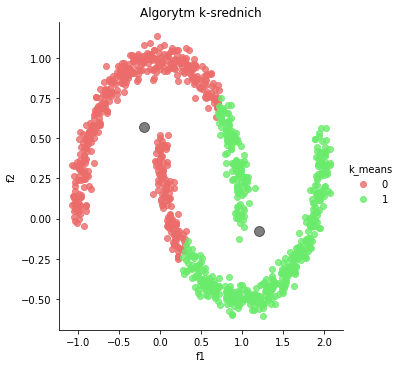

In [20]:
from sklearn.datasets import make_moons
import pandas as pd
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

kmeans = KMeans(n_clusters=2, init="k-means++")
kmeans.fit(x, y)
y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_
 
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

K-means does not perform well in this example

### Clustering II - hierarchical methods

### Dendrograms

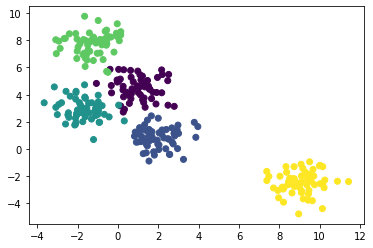

In [21]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=2, init="random")
kmeans.fit(X, y)
y_pred = kmeans.predict(X)

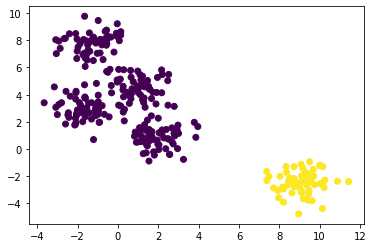

In [23]:
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

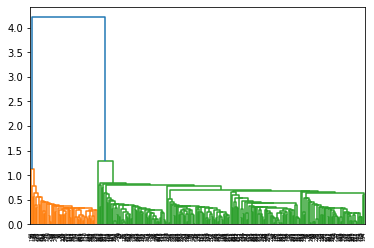

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(X)
dendr = dendrogram(link)

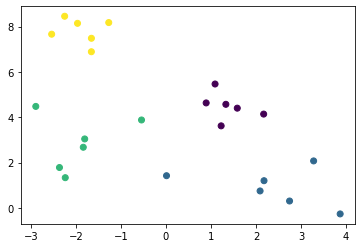

In [25]:
X, y_true = make_blobs(n_samples=24, centers=4, cluster_std=0.8, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.show()

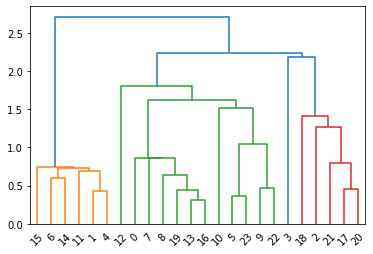

In [26]:
link = linkage(X)
dendr = dendrogram(link)

### Agglomerative clustering

In [27]:
df = pd.read_csv("shopping_data.csv")
df.head()
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


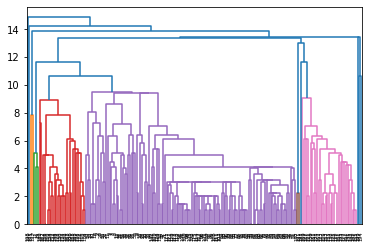

In [28]:
link = linkage(X, method='single')
dendr = dendrogram(link)

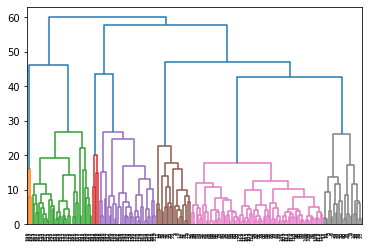

In [29]:
link = linkage(X, method='average')
dendr = dendrogram(link)

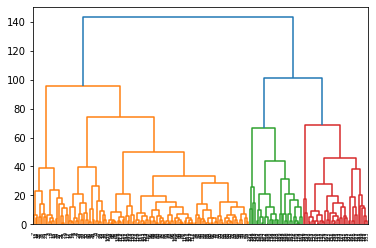

In [30]:
link = linkage(X, method='complete')
dendr = dendrogram(link)

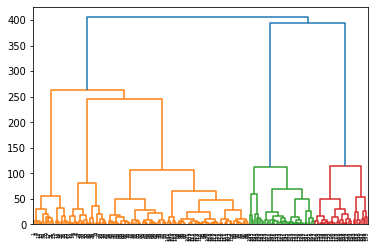

In [31]:
link = linkage(X, method='ward')
dendr = dendrogram(link)

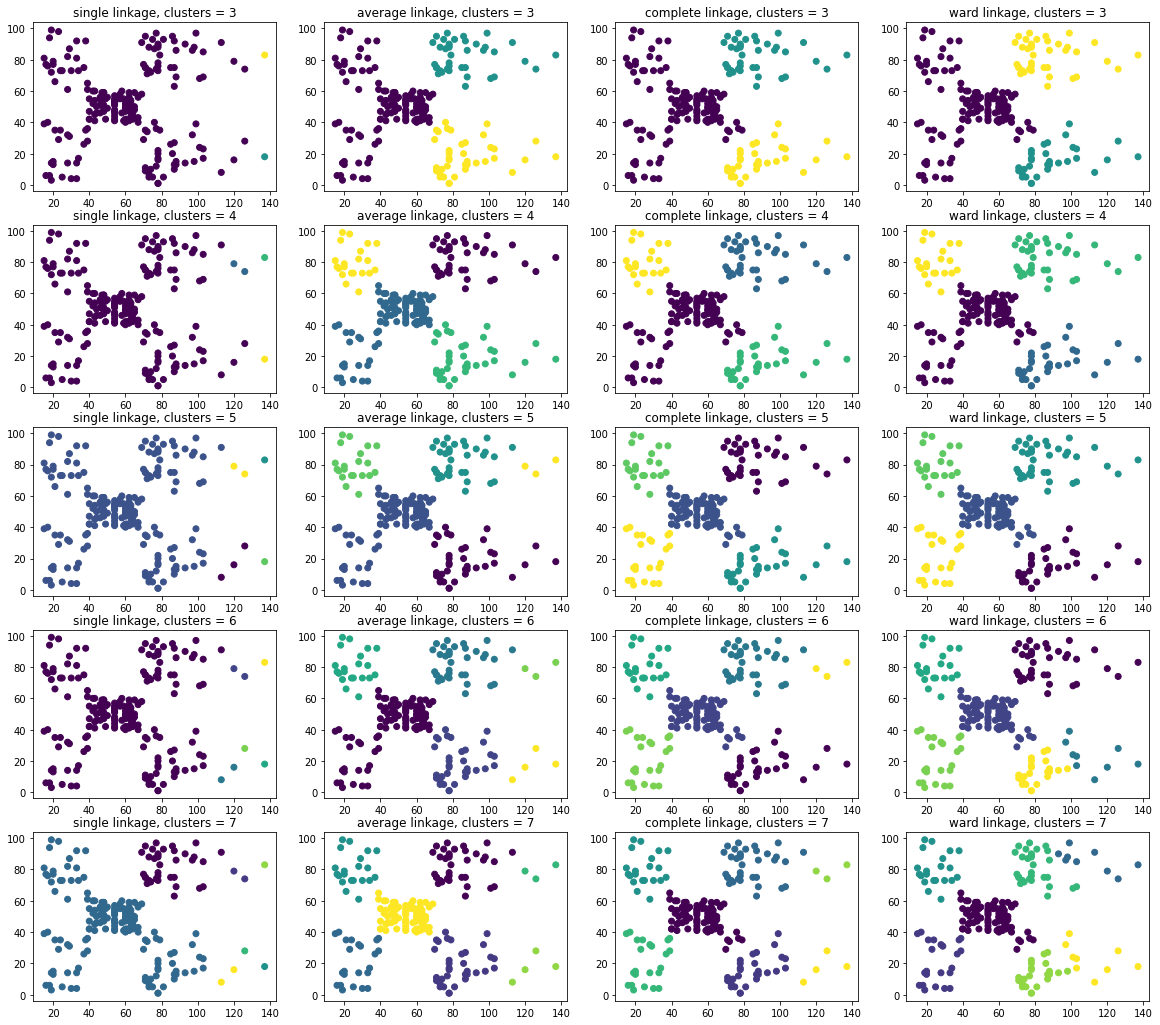

In [32]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

link_methods = ["single", "average", "complete", "ward"]
X = np.array(X)
plt_cnt = 1
plt.figure(figsize=(20, 18))

for clusters in range(3, 8):
    for method in link_methods:
        aggcl = AgglomerativeClustering(n_clusters=clusters, linkage=method)
        aggcl.fit(X)

        plt.subplot(5, 4, plt_cnt)
        plt.title(method + " linkage, clusters = " + str(clusters))
        plt.scatter(X[:,0], X[:,1], c=aggcl.labels_)
        
        plt_cnt += 1



The best result I receive by choosing 5 clusters and complete or ward method of linkage

### Selecting the number of clusters with silhouette analysis on KMeans clustering

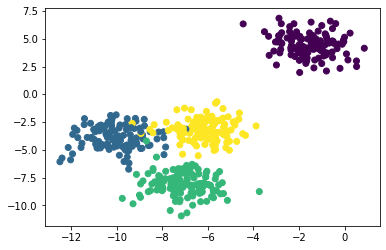

In [33]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1) 
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


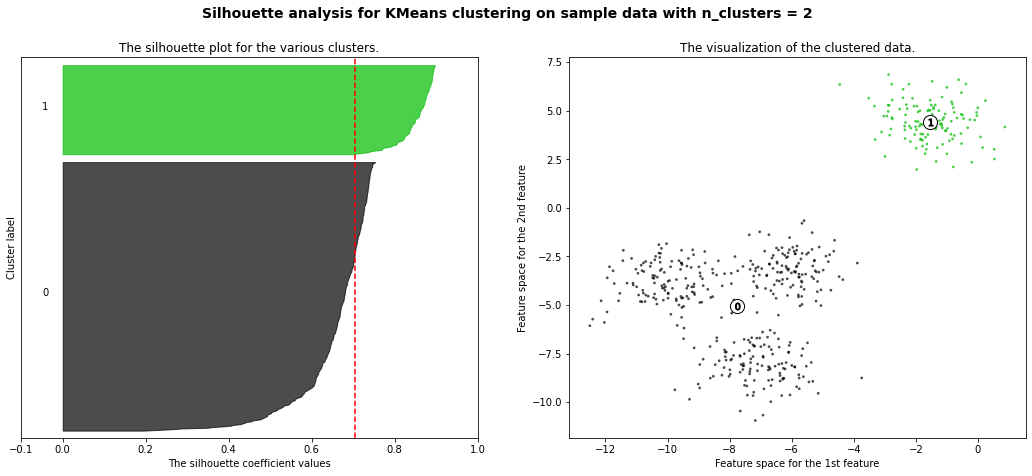

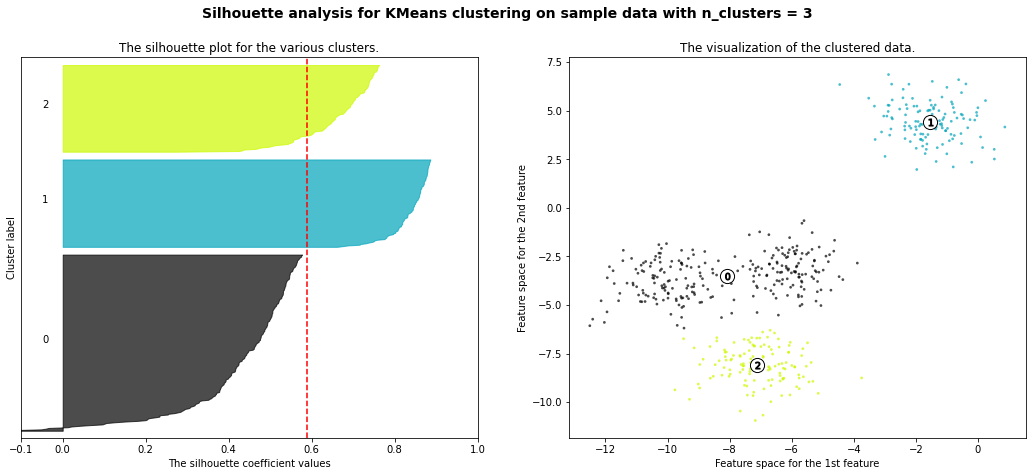

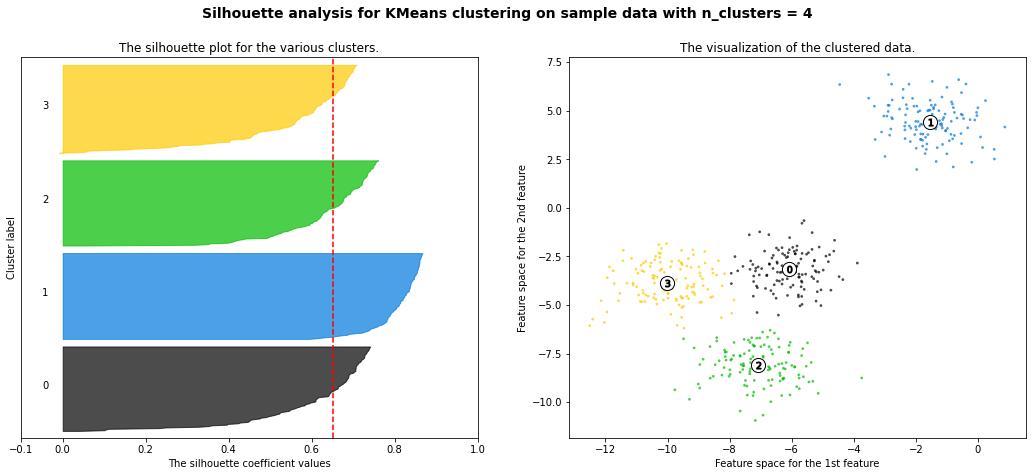

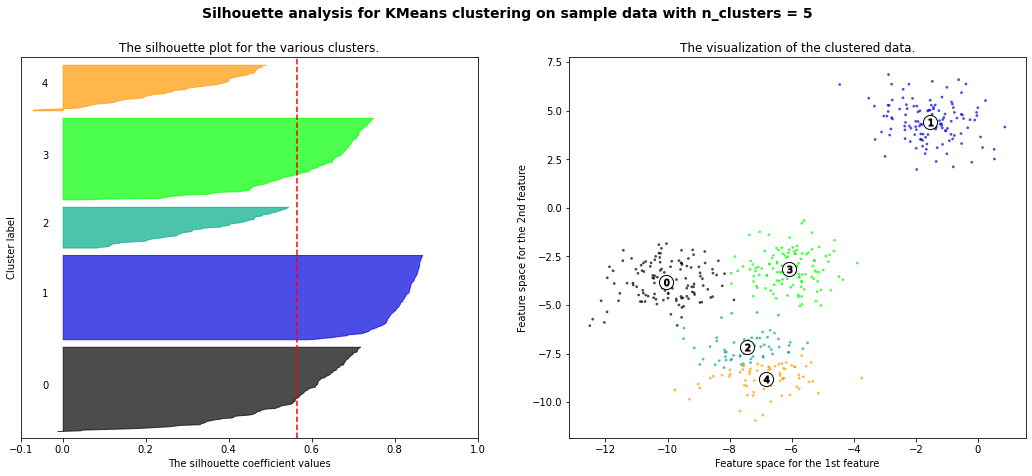

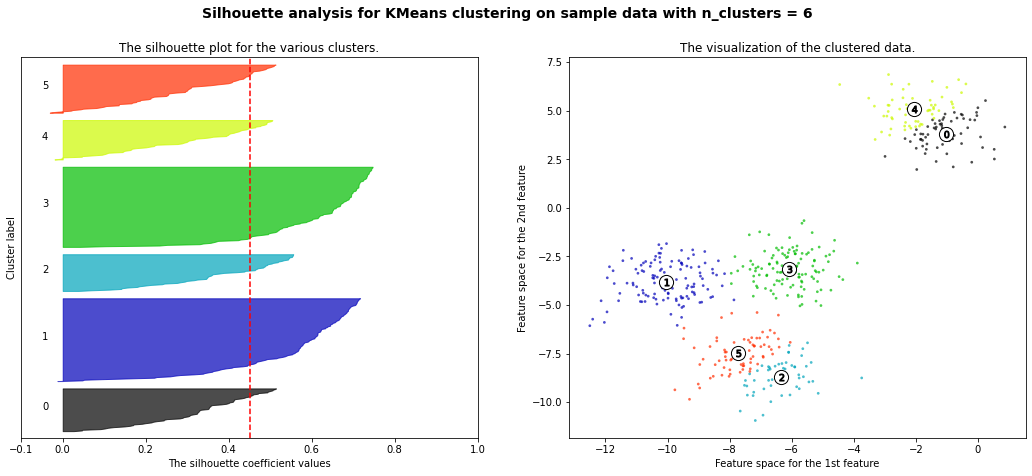

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [37]:
from sklearn import  datasets
from sklearn.cluster import DBSCAN

moons = datasets.make_moons(n_samples=200, noise=.05, random_state=0)
circles = datasets.make_circles(n_samples=200,  noise=.05, random_state=0)
blobs = datasets.make_blobs(n_samples=200, random_state=0)


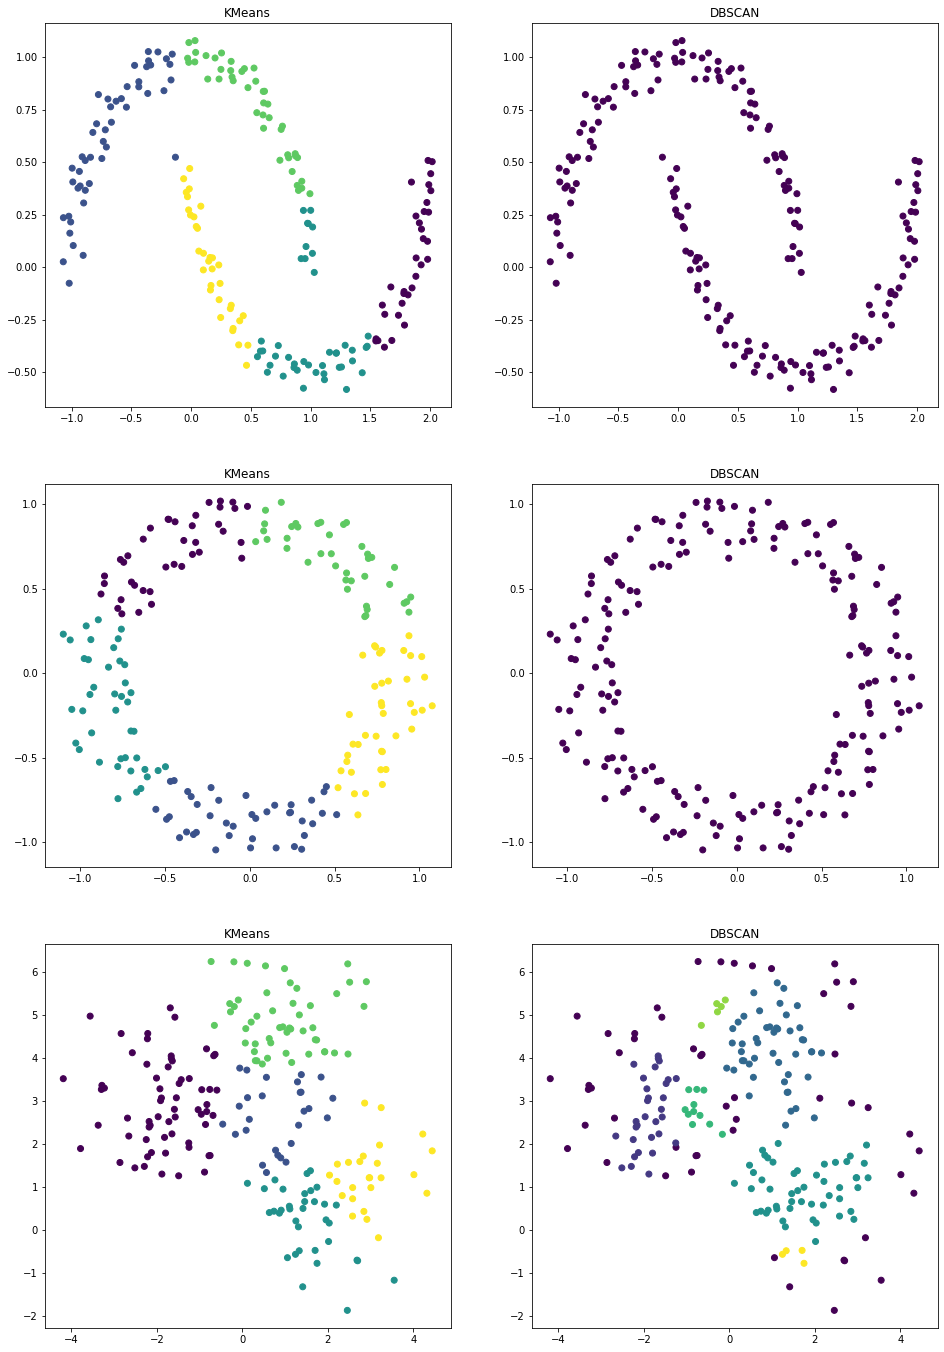

In [46]:
datas = [moons, circles, blobs]
plot_num = 1
plt.figure(figsize=(16, 24))
for dataset in datas:
    X, y = dataset
    y_pred_km = KMeans(n_clusters=5).fit_predict(X, y)
    y_pred_db = DBSCAN().fit_predict(X, y)

    plt.subplot(3, 2, plot_num)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred_km)
    plt.title("KMeans")
    plot_num += 1
    
    plt.subplot(3, 2, plot_num)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred_db)
    plt.title("DBSCAN")
    plot_num += 1